<font color='blue'>
    
# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Multi Layer Well
    
</font>

## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import defaultdict # library to create var dictionaries
from openserver import OpenServer
from IPython.display import Javascript # Ejecutar un rango de celdas

## Create Dictionaries to fill inputs, results ##
my_dict = defaultdict(list) # dictionary to save VLP and IPR Curves
my_dict_sol = defaultdict(list) # dictionary to save ALL Solutions
my_dict_input_S = defaultdict(list) # dictionary to save Input WITH solution
my_dict_input_NS = defaultdict(list) # dictionary to save Input WITHOUT solution
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs from loop



## 2. Input Variables

In [2]:
## RESERVOIR PRESSURE - Uniform distribution
Pr_L1_low, Pr_L1_high= 2000, 3000 # Pressure Layer 1
Pr_L2_low, Pr_L2_high= 2000, 4500 # Pressure Layer 2

## PERMEABILITY
k_Low_limit, k_High_limit = 0.001, 10000 # Permeability limits to truncate distribution. Avoid negative permeability

k_L1_mean, k_L1_SD= 7, 6 # Permeability Layer 1
k_L2_mean, k_L2_SD= 5, 4 # Permeability Layer 2

## RESERVOIR HEIGHT
h_Low_limit, h_High_limit = 0.1, 500 #limits to truncate distribution
h_L1_mean, h_L1_SD= 20, 6 # Layer 1
h_L2_mean, h_L2_SD= 50, 4 # Layer 2

## Skin
S_Low_limit, S_High_limit = -5, 200 #limits to truncate distribution
S_L1_mean, S_L1_SD= 2, 6 # Layer 1
S_L2_mean, S_L2_SD= 5, 4 # Layer 2

## WGR
WGR_Low_limit, WGR_High_limit = 0, 1000 #limits to truncate distribution
WGR_L1_mean, WGR_L1_SD= 50, 6 # Layer 1
WGR_L2_mean, WGR_L2_SD= 15, 4 # Layer 2

## Drainage Area - Uniform distribution 
DA_L1_low, DA_L1_high= 200, 300 # Layer 1
DA_L2_low, DA_L2_high= 200, 400 # Layer 2

## Top Node Pressure
Top_Press_low, Top_Press_high= 200, 1000 # Top Node Pressure limits

## 3. Plot input variables distributions

In [ ]:
### Run multiple Cells to create Input variable distributions ###
Javascript("Jupyter.notebook.execute_cell_range(7,19)")

In [35]:
### Set RGB color variables ###
c_red = (255/255, 0/255, 0/255) # red
c_blu = (0/255, 0/255, 255/255) # Blue
c_gre = (0/255, 255/255, 0/255) # Green
c_ora = (255/255, 165/255, 0/255) # Orange

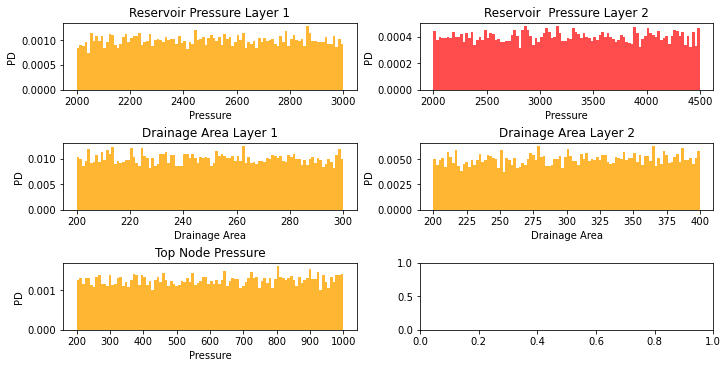

In [44]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(10,5), layout ='constrained')

Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 10000)
# Graficar distribución
ax[0,0].hist(Pr_L1, bins=100, density=True, align='mid', color=c_ora, alpha=0.8)
ax[0,0].set_xlabel('Pressure')
ax[0,0].set_ylabel('PD')
ax[0,0].set_title('Reservoir Pressure Layer 1')


Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 10000)
# Graficar distribución
ax[0,1].hist(Pr_L2, bins=100, density=True, align='mid', color=c_red, alpha=0.7)
ax[0,1].set_xlabel('Pressure')
ax[0,1].set_ylabel('PD')
ax[0,1].set_title('Reservoir  Pressure Layer 2')

DA_L1 = np.random.uniform(low = DA_L1_low, high = DA_L1_high, size = 10000)
# Graficar distribución
ax[1,0].hist(DA_L1, bins=100, density=True, align='mid', color=c_ora, alpha=0.8)
ax[1,0].set_xlabel('Drainage Area')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('Drainage Area Layer 1')

DA_L2 = np.random.uniform(low = DA_L2_low, high = DA_L2_high, size = 10000)
# Graficar distribución
ax[1,1].hist(DA_L2, bins=100, density=True, align='mid', color=c_ora, alpha=0.8)
ax[1,1].set_xlabel('Drainage Area')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('Drainage Area Layer 2')


Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 10000)
# Graficar distribución
ax[2,0].hist(Top_Press, bins=100, density=True, align='mid', color=c_ora, alpha=0.8)
ax[2,0].set_xlabel('Pressure')
ax[2,0].set_ylabel('PD')
ax[2,0].set_title('Top Node Pressure');

### Create function to plot normal distributions

In [8]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit, V_x_Label, V_Title, n_col):
    
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[0,n_col].hist(N_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.7)
    AX[0,n_col].set_xlabel(V_x_Label)
    AX[0,n_col].set_ylabel('Probability Density')
    AX[0,n_col].set_title(V_Title)
    x_axis = AX[0,n_col].set_xlim()

    ## generate data for truncated normal distribution
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD,size=V_samples)

    ## Plot truncated Normal distribution
    AX[1,n_col].hist(NT_Samples, bins=100, density=True, align='mid', color=(RBG), alpha=0.4)
    AX[1,n_col].set_xlabel(V_x_Label)
    AX[1,n_col].set_ylabel('Probability Density')
    AX[1,n_col].set_title(V_Title + ' (TRUNCATED)')
    AX[1,n_col].set_xlim(x_axis)


## 3.2 Permeability Distributions

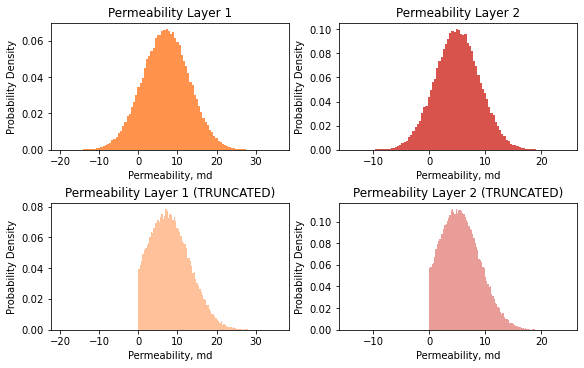

In [9]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Permeability Layer 1', 'Permeability, md'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(k_L1_mean, k_L1_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Permeability Layer 2', 'Permeability, md'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(k_L2_mean, k_L2_SD, 100000,k_Low_limit,k_High_limit, V_x_Label, V_Title, 1)

## 3.3 Height Distributions

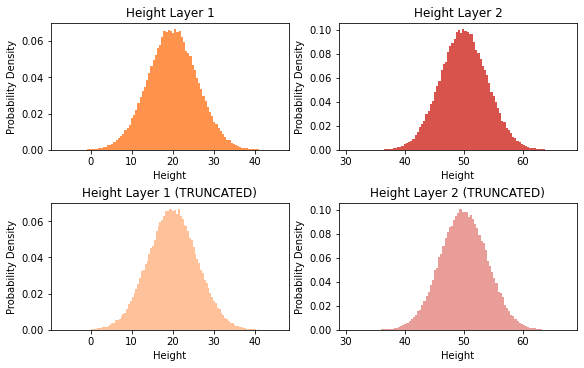

In [10]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'Height Layer 1', 'Height'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(h_L1_mean, h_L1_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Height Layer 2', 'Height'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(h_L2_mean, h_L2_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 1)

## 3.4 Skin Distributions

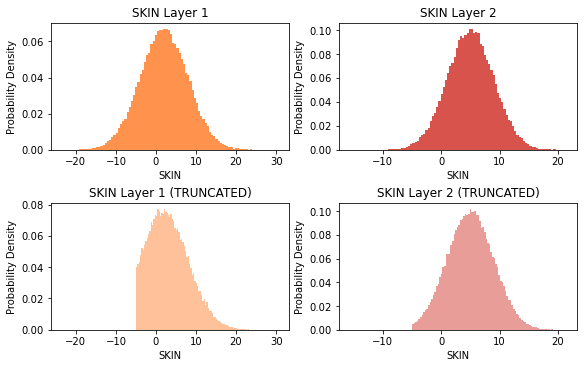

In [11]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'SKIN Layer 1', 'SKIN'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(S_L1_mean, S_L1_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'SKIN Layer 2', 'SKIN'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(S_L2_mean, S_L2_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 1)

## 3.5 WGR Distribution

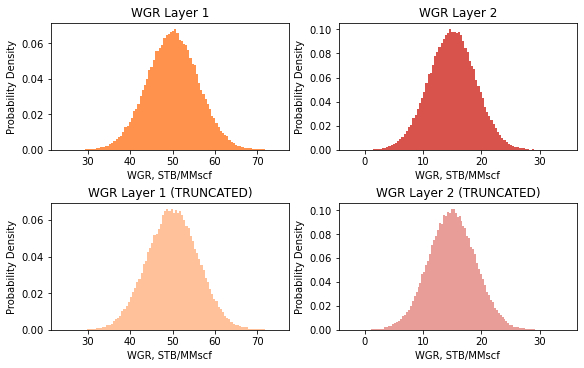

In [12]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(8,5), layout ='constrained')

V_Title, V_x_Label = 'WGR Layer 1', 'WGR, STB/MMscf'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(WGR_L1_mean, WGR_L1_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'WGR Layer 2', 'WGR, STB/MMscf'
RBG = 200/255, 10/255, 0/255
Generate_normal_and_Truncated(WGR_L2_mean, WGR_L2_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 1)

# 4. Start calc for sensitivity analysis (PROSPER)

In [15]:

c = OpenServer()
c.connect()

Pr = 3000
n = range(1000)

for i in n:
    
    print('Index: ', i)
    
    ## Reservoir Pressure ##
    Pr_L1 = np.random.uniform(low=Pr_L1_low, high= Pr_L1_high, size = 1)
    my_dict_input_vals['Pr_L1'].extend(Pr_L1)
 
    Pr_L2 = np.random.uniform(low=Pr_L2_low, high= Pr_L2_high, size = 1)
    my_dict_input_vals['Pr_L2'].extend(Pr_L2)
    
    # PROSPER.SIN.IPR.Single.MLayer[0].DAREA
    DA_L1 = np.random.uniform(low=DA_L1_low, high= DA_L1_high, size = 1)
    my_dict_input_vals['Drainage_Area_L1'].extend(DA_L1)
    
    DA_L2 = np.random.uniform(low=DA_L2_low, high= DA_L2_high, size = 1)
    my_dict_input_vals['Drainage_Area_L2'].extend(DA_L2)
    
    
    #k_L1 = np.random.normal(loc = k_L1_mean, scale = k_L1_SD, size= 1) # normal distribution
    mu = k_L1_mean #mean
    sigma = k_L1_SD #SD
    k_L1 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['k_L1'].extend(k_L1)
    print('Perm Layer 1 = ', k_L1)
    
    
    #k_L2 = np.random.normal(loc = k_L2_mean, scale = k_L2_SD, size= 1) # normal distribution
    mu = k_L2_mean #mean
    sigma = k_L2_SD #SD
    k_L2 = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['k_L2'].extend(k_L2)   
    print('Perm Layer 2 = ', k_L2)

    
    mu = h_L1_mean #mean
    sigma = h_L1_SD #SD
    h_L1 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['h_L1'].extend(h_L1)   
    print('Height L1 = ', h_L1)
    
    mu = h_L2_mean #mean
    sigma = h_L2_SD #SD
    h_L2 = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['h_L2'].extend(h_L2)   
    print('Height L2 = ', h_L2)    
 
    
    mu = S_L1_mean #mean
    sigma = S_L1_SD #SD
    S_L1 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['S_L1'].extend(S_L1)   
    print('S L1 = ', S_L1)
    
    mu = S_L2_mean #mean
    sigma = S_L2_SD #SD
    S_L2 = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['S_L2'].extend(S_L2)   
    print('S L2 = ', S_L2)  
    
    mu = WGR_L1_mean #mean
    sigma = WGR_L1_SD #SD
    WGR_L1 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['WGR_L1'].extend(WGR_L1)   
    print('WGR L1 = ', WGR_L1)

    mu = WGR_L2_mean #mean
    sigma = WGR_L2_SD #SD
    WGR_L2 = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    my_dict_input_vals['WGR_L2'].extend(WGR_L2)   
    print('WGR L2 = ', WGR_L2)
    
    ## Wellbore radius ##
    Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 1)
    my_dict_input_vals['Top_Press'].extend(Top_Press)
    
    
    
    
    ## Set Layer Pressure
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PRESSURE', Pr_L1) # Change Reservoir pressure for Layer 1
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PRESSURE', Pr_L2) # Change Reservoir pressure for Layer 2
    
    ## Set Layer Permeability
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].PERM', k_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].PERM', k_L2)
    
    ## Set Layer Height
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].HEIGHT', h_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].HEIGHT', h_L2)    
    
    ## Set Skin
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].SKIN', S_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].SKIN', S_L2) 
    
    ## Set WGR
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].WC', WGR_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].WC', WGR_L2) 
    
    ## Drainage Area
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[0].DAREA', DA_L1)
    c.DoSet('PROSPER.SIN.IPR.Single.MLayer[1].DAREA', DA_L2)
    
    ## Top Node Pressure
    c.DoSet('PROSPER.ANL.SYS.Pres', Top_Press)
    
    
    
    ## Calculate new IPR ##
    c.DoCmd('PROSPER.IPR.CALC')

    ## Calculate model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution

    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    #print(Gas_Curve)
    print(Gas_Sol)
    print(BHP_SOL)
    
    T_val = 'Sol_Gas'
    my_dict_sol[T_val].extend([Gas_Sol])
    
    T_val = 'Sol_Pressure'
    my_dict_sol[T_val].extend([Gas_Sol])
    
    ## Insert Input Val to Dictionary When Calculation has NO Solution
    if Gas_Sol > 0: 
        my_dict_input_S['Pr_L1'].extend(Pr_L1)
        my_dict_input_S['Pr_L2'].extend(Pr_L2)
        my_dict_input_S['Drainage_Area_L1'].extend(DA_L1)
        my_dict_input_S['Drainage_Area_L2'].extend(DA_L2)
    
    if Gas_Sol == 0: 
        my_dict_input_NS['Pr_L1'].extend(Pr_L1)
        my_dict_input_NS['Pr_L2'].extend(Pr_L2)
        my_dict_input_NS['Drainage_Area_L1'].extend(DA_L1)
        my_dict_input_NS['Drainage_Area_L2'].extend(DA_L2)
        
    ## Insert to Dictionary VLP + IPR ##
    T_val = str(i) + '_G'
    my_dict[T_val].extend(Gas_Curve)
    
    T_val = str(i) + '_IPR'
    my_dict[T_val].extend(IPR_Curve)

    T_val = str(i) + '_VLP'
    my_dict[T_val].extend(VLP_Curve)
    
c.disconnect

#type(Gas_Curve)




OpenServer is connected
Index:  0
Perm Layer 1 =  [6.06094743]
Perm Layer 2 =  [2.0245521]
Height L1 =  [26.22798051]
Height L2 =  [51.09465485]
S L1 =  [2.36606323]
S L2 =  [10.07876235]
WGR L1 =  [58.52796414]
WGR L2 =  [20.20989409]
2.418851614
2078.914550781
Index:  1
Perm Layer 1 =  [6.24678723]
Perm Layer 2 =  [4.36367581]
Height L1 =  [5.24162448]
Height L2 =  [55.0603097]
S L1 =  [4.68204255]
S L2 =  [11.42474665]
WGR L1 =  [52.14901457]
WGR L2 =  [19.44378178]
3.403152466
2488.605957031
Index:  2
Perm Layer 1 =  [11.3521066]
Perm Layer 2 =  [18.22320684]
Height L1 =  [26.60169637]
Height L2 =  [44.87520797]
S L1 =  [-0.48193078]
S L2 =  [8.35752759]
WGR L1 =  [45.4198547]
WGR L2 =  [16.39190707]
5.455980301
3070.343994141
Index:  3
Perm Layer 1 =  [8.04422078]
Perm Layer 2 =  [9.43283311]
Height L1 =  [20.58947705]
Height L2 =  [44.19007156]
S L1 =  [1.90814915]
S L2 =  [-4.2114031]
WGR L1 =  [55.94571105]
WGR L2 =  [10.56861718]
0.0
0.0
Index:  4
Perm Layer 1 =  [10.40424782]

<bound method OpenServer.disconnect of <openserver.openserver.OpenServer object at 0x000002280F977520>>

<font color='blue'>
    
# ANALYZE RESULTS
***
</font>

In [ ]:
### Show dictionary content ###
#print(my_dict)

## 5. Convert dictionaries to DataFrame

In [ ]:
Javascript("Jupyter.notebook.execute_cell_range(10,16)")

In [16]:
## Convert dictionary variables to DataFrame
df = pd.DataFrame(my_dict)
dfS = pd.DataFrame(my_dict_sol)
df_In_S = pd.DataFrame(my_dict_input_S)
df_In_NS = pd.DataFrame(my_dict_input_NS)
dfIn = pd.DataFrame(my_dict_input_vals)

In [17]:
## Show how many solutions are = 0
Iterations_No_Sol = (dfS['Sol_Gas'] == 0).sum()

print('* Total Iterations = ', i+1)
print('* Iterations without Solution =', Iterations_No_Sol, '(',(Iterations_No_Sol/(i+1)*100).round(2),'%)' )
print('* Iterations with Solution =', (dfS['Sol_Gas'] > 0).sum())

* Total Iterations =  1000
* Iterations without Solution = 224 ( 22.4 %)
* Iterations with Solution = 776


## 6. QC Input data generated with Loop

In [18]:
## Show Inputa DataFrame
#pd.set_option('display.max_rows',10)
# i is generated inside Loop
dfIn.head(i+1)

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
0,2434.127545,2481.189704,291.890538,290.808038,6.060947,2.024552,26.227981,51.094655,2.366063,10.078762,58.527964,20.209894,396.633586
1,2860.126133,3256.061017,238.442688,219.441241,6.246787,4.363676,5.241624,55.060310,4.682043,11.424747,52.149015,19.443782,742.515236
2,2872.836408,3590.417113,213.220466,364.901397,11.352107,18.223207,26.601696,44.875208,-0.481931,8.357528,45.419855,16.391907,351.124742
3,2652.267302,3712.170944,285.305308,284.651124,8.044221,9.432833,20.589477,44.190072,1.908149,-4.211403,55.945711,10.568617,958.021363
4,2331.634283,2607.827093,234.942510,334.850925,10.404248,6.435695,20.791105,50.507818,-3.371980,9.716203,52.560718,15.431767,628.146020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2133.197382,2912.299673,254.805591,260.029581,4.052640,7.898962,23.927352,49.648429,-3.701443,3.006445,52.016888,10.452294,846.127789
996,2939.816774,2287.650492,231.392036,275.814769,14.053212,3.452760,10.108322,50.644597,5.624883,9.978950,48.664285,12.116904,583.248200
997,2613.124093,2775.447485,235.257461,367.280075,8.425579,1.593787,10.098309,44.198610,9.208732,6.074910,48.081793,14.145061,905.922599
998,2650.902451,2245.059622,204.566602,219.718018,17.410171,3.926633,12.794726,51.846350,9.919915,4.103164,54.243476,11.440313,619.425316


In [19]:
# Show Input Data Statistics
dfIn.describe()

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2,k_L1,k_L2,h_L1,h_L2,S_L1,S_L2,WGR_L1,WGR_L2,Top_Press
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2508.707975,3261.759659,249.098591,299.790776,8.222970,5.893396,19.847992,49.955360,3.240918,5.005930,50.117986,15.090433,596.045784
std,289.751455,722.166242,27.982936,58.204483,4.885325,3.380653,5.966083,4.116268,4.780603,3.929979,5.918183,4.021399,225.423701
min,2000.713151,2003.777492,200.065879,200.815740,0.022798,0.001655,1.954635,36.417481,-4.999227,-4.865732,32.461524,3.313740,201.845452
25%,2257.002016,2619.662327,225.815808,250.410866,4.601350,3.355011,15.884973,47.146284,-0.407996,2.348987,46.127262,12.337687,405.045811
50%,2514.469152,3279.835022,248.944989,299.840711,7.651788,5.628925,19.933219,50.174546,2.899792,5.004276,49.985301,15.011148,599.808201
75%,2764.707410,3893.109526,272.533898,349.152379,11.352346,7.940066,23.931713,52.885603,6.266719,7.553172,54.202847,17.855900,784.218024
max,2999.570822,4495.189157,299.563439,399.979499,28.700556,18.809989,38.030751,61.636629,21.225238,19.037839,72.181252,27.182210,999.969263


## 6.1 Plot Distribution for input variables generated with Loop

Text(0.5, 1.0, 'Permeability Layer 2(Input)')

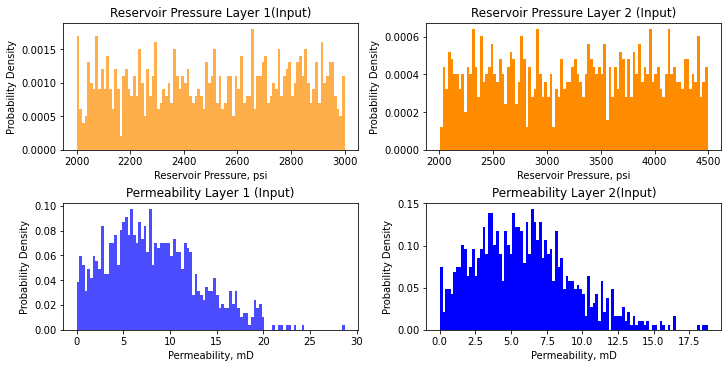

In [20]:
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(10,5), layout ='constrained')

AX[0,0].hist(dfIn['Pr_L1'], bins=100, density=True, align='mid', color=(255/255, 140/255, 0/255), alpha=0.7)
AX[0,0].set_xlabel('Reservoir Pressure, psi')
AX[0,0].set_ylabel('Probability Density')
AX[0,0].set_title('Reservoir Pressure Layer 1(Input)')

AX[0,1].hist(dfIn['Pr_L2'], bins=100, density=True, align='mid', color=(255/255, 140/255, 0/255), alpha=1)
AX[0,1].set_xlabel('Reservoir Pressure, psi')
AX[0,1].set_ylabel('Probability Density')
AX[0,1].set_title('Reservoir Pressure Layer 2 (Input)')

AX[1,0].hist(dfIn['k_L1'], bins=100, density=True, align='mid', color=(0/255,0/255,255/255), alpha=0.7)
AX[1,0].set_xlabel('Permeability, mD')
AX[1,0].set_ylabel('Probability Density')
AX[1,0].set_title('Permeability Layer 1 (Input)')

AX[1,1].hist(dfIn['k_L2'], bins=100, density=True, align='mid', color=(0/255,0/255,255/255), alpha=1)
AX[1,1].set_xlabel('Permeability, mD')
AX[1,1].set_ylabel('Probability Density')
AX[1,1].set_title('Permeability Layer 2(Input)')

## 6.2 View DataFrame iterations with solutions (Qg > 0)

In [22]:
df_In_S

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2
0,2434.127545,2481.189704,291.890538,290.808038
1,2860.126133,3256.061017,238.442688,219.441241
2,2872.836408,3590.417113,213.220466,364.901397
3,2331.634283,2607.827093,234.942510,334.850925
4,2734.800460,3848.604054,245.175466,347.305976
...,...,...,...,...
771,2853.412254,2958.285972,258.669856,226.249228
772,2560.233035,4282.566517,272.023629,240.795207
773,2578.298705,3361.839696,208.169381,233.563353
774,2939.816774,2287.650492,231.392036,275.814769


## View DataFrame iterations without solutions (Qg = 0)

In [24]:
df_In_NS

,Pr_L1,Pr_L2,Drainage_Area_L1,Drainage_Area_L2
0,2652.267302,3712.170944,285.305308,284.651124
1,2804.181264,2341.106999,244.449743,386.719186
2,2173.077723,2763.170380,270.170916,309.640367
3,2750.296784,2165.692665,283.906863,252.271305
4,2621.322032,2416.949802,214.110485,233.848795
...,...,...,...,...
219,2653.108813,2038.575195,278.686116,254.045064
220,2386.368119,2831.497319,238.123118,215.325624
221,2133.197382,2912.299673,254.805591,260.029581
222,2613.124093,2775.447485,235.257461,367.280075


Text(0.5, 1.0, 'Permeability Layer 1 (Input)')

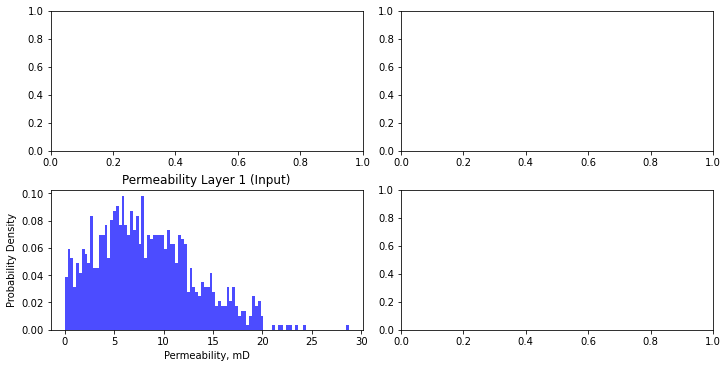

In [25]:
## Plot 
fig, AX = plt.subplots(nrows = 2, ncols=2, figsize=(10,5), layout ='constrained')

AX[1,0].hist(dfIn['k_L1'], bins=100, density=True, align='mid', color=(0/255,0/255,255/255), alpha=0.7)
AX[1,0].set_xlabel('Permeability, mD')
AX[1,0].set_ylabel('Probability Density')
AX[1,0].set_title('Permeability Layer 1 (Input)')

## 7. QC SOLUTION (P vs Qg) Data Generated with loop

In [26]:
# Show solutions data frame (Gas rate + BHFP), i from loop
dfS.round(2)
dfS.head(i+1)

,Sol_Gas,Sol_Pressure
0,2.418852,2.418852
1,3.403152,3.403152
2,5.455980,5.455980
3,0.000000,0.000000
4,2.435138,2.435138
...,...,...
995,0.000000,0.000000
996,2.300442,2.300442
997,0.000000,0.000000
998,0.000000,0.000000


In [27]:
# Show VLP vs IPR Data Statistics

Sol_Gas_mean = dfS['Sol_Gas'].mean()
print("Gas Solution Mean = ", np.round(Sol_Gas_mean, decimals = 3))

Sol_Gas_std = dfS['Sol_Gas'].std()
print("Gas Solution Std = ", np.round(Sol_Gas_std, decimals = 3))

Sol_Pressure_mean = dfS['Sol_Pressure'].mean()
print("Pressure Solution Mean = ", np.round(Sol_Pressure_mean, decimals = 3))

dfS.describe()

Gas Solution Mean =  3.399
Gas Solution Std =  2.153
Pressure Solution Mean =  3.399


,Sol_Gas,Sol_Pressure
count,1000.000000,1000.000000
mean,3.398953,3.398953
std,2.152653,2.152653
min,0.000000,0.000000
25%,2.444557,2.444557
50%,3.746591,3.746591
75%,4.918030,4.918030
max,9.097697,9.097697


## 7.1 Plot Solution distributions

0.1853258950871261


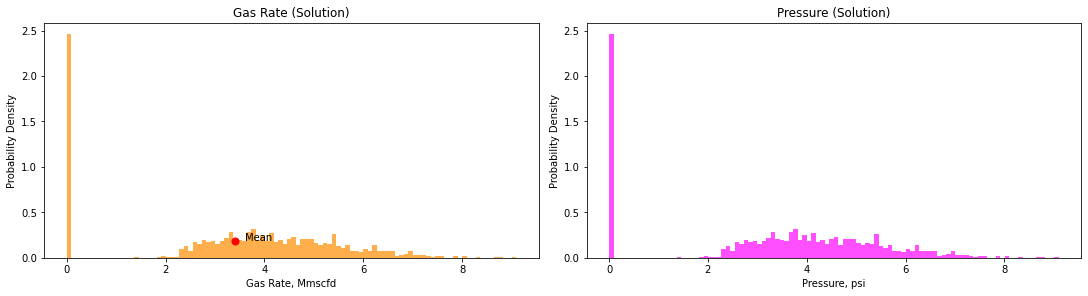

In [28]:
# Plot Solution distributions
fig, AX = plt.subplots(nrows = 1, ncols=2, figsize=(15,4), layout ='constrained')

AX[0].hist(dfS['Sol_Gas'], bins=100, density=True, align='mid', color=(255/255, 140/255, 0/255), alpha=0.7)
AX[0].set_xlabel('Gas Rate, Mmscfd')
AX[0].set_ylabel('Probability Density')
AX[0].set_title('Gas Rate (Solution)')

AX[1].hist(dfS['Sol_Pressure'], bins=100, density=True, align='mid', color=(255/255, 5/255, 255/255), alpha=0.7)
AX[1].set_xlabel('Pressure, psi')
AX[1].set_ylabel('Probability Density')
AX[1].set_title('Pressure (Solution)')

Sol_Gas_pdf_mean = stats.norm(loc= Sol_Gas_mean, scale = Sol_Gas_std).pdf(Sol_Gas_mean)
print(Sol_Gas_pdf_mean)

AX[0].scatter(Sol_Gas_mean, Sol_Gas_pdf_mean,  label='Solutions',color=(255/255, 0/255, 0/255), alpha=1, s= 50)

AX[0].annotate('Mean', (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));


## 8. QC Solution VLP + IPR

In [ ]:
# Show VLP and IPR DF
df.head(i+1)

In [ ]:
df.describe()

# 9. Crear gráficas con libreria matplotlib

## 9.1 plot first sample VLP and IPR 

In [ ]:
## Specify iteration to plot VLP, IPR and Solution
Index_TP = 45

## Get Column names
df_col_names =df.columns.tolist()
print(df_col_names[Index_TP*3])
print(df_col_names[(Index_TP*3)+1])

plt.plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

plt.plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

plt.plot(dfS['Sol_Gas'].iloc[Index_TP], dfS['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 10,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
plt.legend()
plt.xlim(left=0)

y_max = df['0_IPR'].max()
print("Gas Solution = ", dfS['Sol_Gas'].iloc[Index_TP])
print("Pressure Solution = ", dfS['Sol_Pressure'].iloc[Index_TP])
plt.show()

## 9.2 Plot multiple (IPR + VLP) curves

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(100)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [ ]:
# Create new DataFrame to work with
df_VI = df.copy(deep=True)
df_VI

In [ ]:
## Replace 0 values for NAN (improve plot)
df_VI.replace(0, np.nan, inplace=True)
df_VI

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()

n = range(10)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df_VI[df_col_names[Qg_i]], df_VI[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df_VI[df_col_names[Qg_i]], df_VI[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

## 10. Plot Solutions

In [ ]:
# Plot solutions
fig, ax = plt.subplots(figsize=(10,3),layout ='constrained')
ax.scatter(dfS['Sol_Gas'], dfS['Sol_Pressure'],  label='Solutions', color=(255/255, 0/255, 0/255), alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax.set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax.set_ylabel('Pressure, psi')
ax.set_title('Sensitivity Analysis Solutions', weight='bold', color=(0/255, 0/255, 255/255))
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)



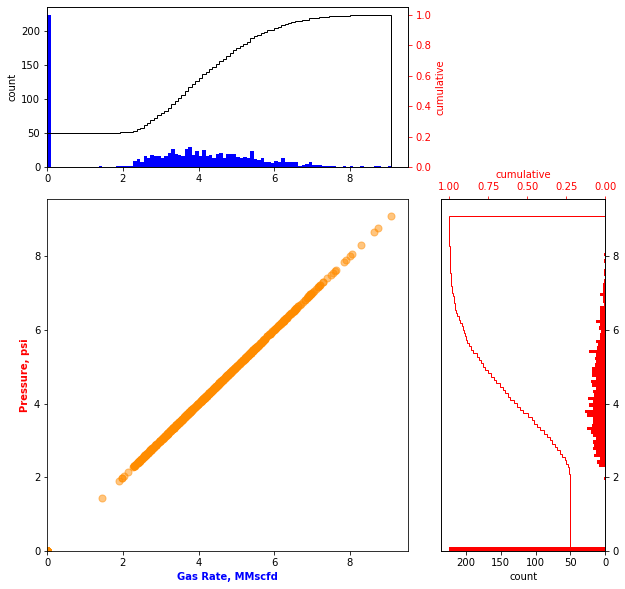

In [31]:

import matplotlib.gridspec as gridspec


x = dfS['Sol_Gas']
y = dfS['Sol_Pressure']

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5)
#ax_main.set(xlabel="Gas Rate, MMscfd", ylabel="Pressure, psi")
ax_main.set_xlabel('Gas Rate, MMscfd', color=(0/255, 0/255, 255/255), weight='bold')
ax_main.set_ylabel('Pressure, psi', color=(255/255, 0/255, 0/255), weight='bold')

ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)

## Pressure Distribution ##
ax_xDist.hist(x,bins=100,align='mid', color=(0/255, 0/255, 255/255))
ax_xDist.set(ylabel='count')

ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

## Gas Rate Distribution ##
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color=(255/255, 0/255, 0/255))
ax_yDist.set(xlabel='count')

ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

ax_yDist.invert_xaxis()
ax_yDist.yaxis.tick_right()
ax_yCumDist.invert_xaxis()

plt.show()

## 11. Create cross-plots input vs solutions

In [30]:
## Get Column names
df_col_names =df.columns.tolist()
df_col_names_In = dfIn.columns.tolist()
print(df_col_names_In)

['Pr_L1', 'Pr_L2', 'Drainage_Area_L1', 'Drainage_Area_L2', 'k_L1', 'k_L2', 'h_L1', 'h_L2', 'S_L1', 'S_L2', 'WGR_L1', 'WGR_L2', 'Top_Press']


In [ ]:
# Plot input vs Gas Rate Solution
fig, ax = plt.subplots(figsize=(5,3),layout ='constrained')
i = 9

ax.scatter(dfS['Sol_Gas'], dfIn[df_col_names_In[i]],  label='Solutions', color=(255/255, 140/255, 0/255), alpha=0.5)
ax.set_xlabel('Gas Rate, MMscfd')
ax.set_ylabel(df_col_names_In[i])
ax.set_title('Cross-plot', weight='bold')

#ax_main.set_xlim(left=dfIn[df_col_names_In[i]])
ax.set_ylim(bottom=dfIn[df_col_names_In[i]].min())
ax.set_ylim(top=dfIn[df_col_names_In[i]].max())

# Fit with polyfit - from numpy.polynomial.polynomial import polyfit
x = dfS['Sol_Gas']
y = dfIn[df_col_names_In[i]]
b, m = np.polynomial.polynomial.polyfit(x,y, 1)


plt.plot(x, b + m * x, '-')
plt.show()


In [ ]:
## Copy DF 
dfS_NZ = dfS.copy(deep=True)

dfS_NZ = dfS_NZ.drop(0, np.nan, inplace=True)

### Loop all Input variables to plot cross-plots

In [ ]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)
chart_n
fig, AX = plt.subplots(nrows = int(chart_n/3), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0
for i in n:
    #print(i)
    AX[xx,yy].scatter(dfS['Sol_Gas'], dfIn[df_col_names_In[i]], color=(255/255, 140/255, 0/255), alpha=0.7)
    AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
    AX[xx,yy].set_ylabel(df_col_names_In[i])
    #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
    
    yy = yy + 1
    cc = cc + 1
    
    if cc > 2:
        cc = 0
        yy = 0
        xx = xx + 1


## Create new DataFrame with Solution and Input

In [ ]:
# Create new DF to append Gas solution to input variables
corr_DF = dfIn.copy(deep=True)
corr_DF

In [ ]:
## Add Gas Solutions Column
corr_DF['Gas_Sol'] = dfS['Sol_Gas']
corr_DF

In [ ]:
## Check statistics for new DataFrame
corr_DF.describe()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_DF, figsize=(16,12), alpha = 0.5);

In [ ]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

## Print Gas Rate vs Input Correlations
Gas_Sol_Coeff = corr_DF_Coeff['Gas_Sol']
type(Gas_Sol_Coeff)
Gas_Sol_Coeff

In [ ]:
Gas_Sol_Coeff_df = pd.DataFrame(Gas_Sol_Coeff)
Gas_Sol_Coeff_df

In [ ]:
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Gas_Sol'])
print(Gas_Sol_Coeff_df.index)
print(Gas_Sol_Coeff_df)

In [ ]:
print(Gas_Sol_Coeff_df)

In [ ]:
print(Gas_Sol_Coeff_df.index)

In [ ]:
## Calculate correlation parameters NUMPY
np.corrcoef(corr_DF['Gas_Sol'],corr_DF['Pr_L1'])


In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df.index
#print(Input_Var_Names)
y_pos = np.arange(len(Input_Var_Names))
performance = 3 + 10 * np.random.rand(len(Input_Var_Names))
error = np.random.rand(len(Input_Var_Names))

#print(Gas_Sol_Coeff_df['Gas_Sol'])

ax.barh(y_pos, Gas_Sol_Coeff_df['Gas_Sol'], align='center')
ax.set_yticks(y_pos, labels=Input_Var_Names)


ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)')